#Introduction
As a part of this project, we have successfully collected the data to be used for load forecasting i.e the data of the NCT of Delhi.

#Importing Libraries

In [ ]:
import numpy as np  #importing numpy, the library used for implementing arrays in Python
import pandas as pd  # importing pandas library that provide us with a dataframe structure, on which we can do preprocessing stuff
import seaborn as sb #importing seaborn library
import matplotlib.pyplot as plt #importing matplotlib for plotting graphs
from sklearn.model_selection import train_test_split #importing train_test_split to split the data into X (feature variables) and y (target variable)

#Reading the file

In [ ]:
df = pd.read_csv("/content/PROJECT DATA_BE_FINAL YEAR_2024-25.csv") #line of code to convert our csv file into the dataframe

#EDA
##For Whole dataset
Exploratory Data Analysis (EDA) is a fundamental phase in the data analysis process that involves examining and visualizing data sets to uncover their main characteristics.
Visualization plays a crucial role in EDA, as tools such as histograms, scatter plots, and box plots help illustrate relationships, distributions, and trends within the data.

In [ ]:
df #Our dataframe

,DAY,MONTH,YEAR,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
0,1,1,2019,0.0,22.3,5.8,9.4,70.1,160.9,4472.0
1,2,1,2019,0.0,22.7,7.9,11.2,70.6,164.5,4228.0
2,3,1,2019,0.0,19.9,7.0,21.1,83.1,166.9,4331.0
3,4,1,2019,0.0,17.7,8.0,21.5,87.3,134.3,4461.0
4,5,1,2019,0.0,20.9,7.6,21.6,78.8,165.6,4170.0
...,...,...,...,...,...,...,...,...,...,...
1790,27,12,2023,0.0,19.5,10.3,9.4,91.9,145.0,4531.0
1791,28,12,2023,0.0,19.5,9.3,9.4,91.1,146.8,4578.0
1792,29,12,2023,0.0,18.6,12.0,9.4,93.9,144.0,4884.0
1793,30,12,2023,0.0,19.4,12.8,9.4,90.0,113.7,4556.0


In [ ]:
df.shape # (number of rows, number of columns)

(1795, 10)

In [ ]:
df = df.drop(columns = ['DAY','MONTH','YEAR'])  #Droping the columns that we used as a reference to complete data entry and is not needed now

In [ ]:
df.info() #data type information of different columns of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PRECIPITATION           1795 non-null   float64
 1   MAXIMUM TEMPERATURE     1795 non-null   float64
 2   MINIMUM TEMPERATURE     1795 non-null   float64
 3   WIND SPEED              1795 non-null   float64
 4   HUMIDITY                1795 non-null   float64
 5   SOLAR RADIATION         1795 non-null   float64
 6   MAXIMUM DEMAND (IN MW)  1795 non-null   float64
dtypes: float64(7)
memory usage: 98.3 KB


In [ ]:
df.describe() #statistical analysis of the data

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,2.654714,30.994819,19.964568,15.718440,65.103454,214.938106,4699.853872
std,11.573986,7.129868,7.502274,5.725515,17.907079,62.510465,1099.050504
min,0.000000,9.100000,3.000000,5.400000,17.800000,4.100000,2163.000000
25%,0.000000,25.800000,13.000000,11.200000,55.000000,168.400000,3806.500000
50%,0.000000,32.700000,21.500000,14.800000,67.200000,211.500000,4468.000000
75%,0.000000,36.000000,26.800000,18.400000,78.050000,265.350000,5548.500000
max,148.012000,47.000000,33.600000,63.400000,99.300000,335.200000,7695.000000


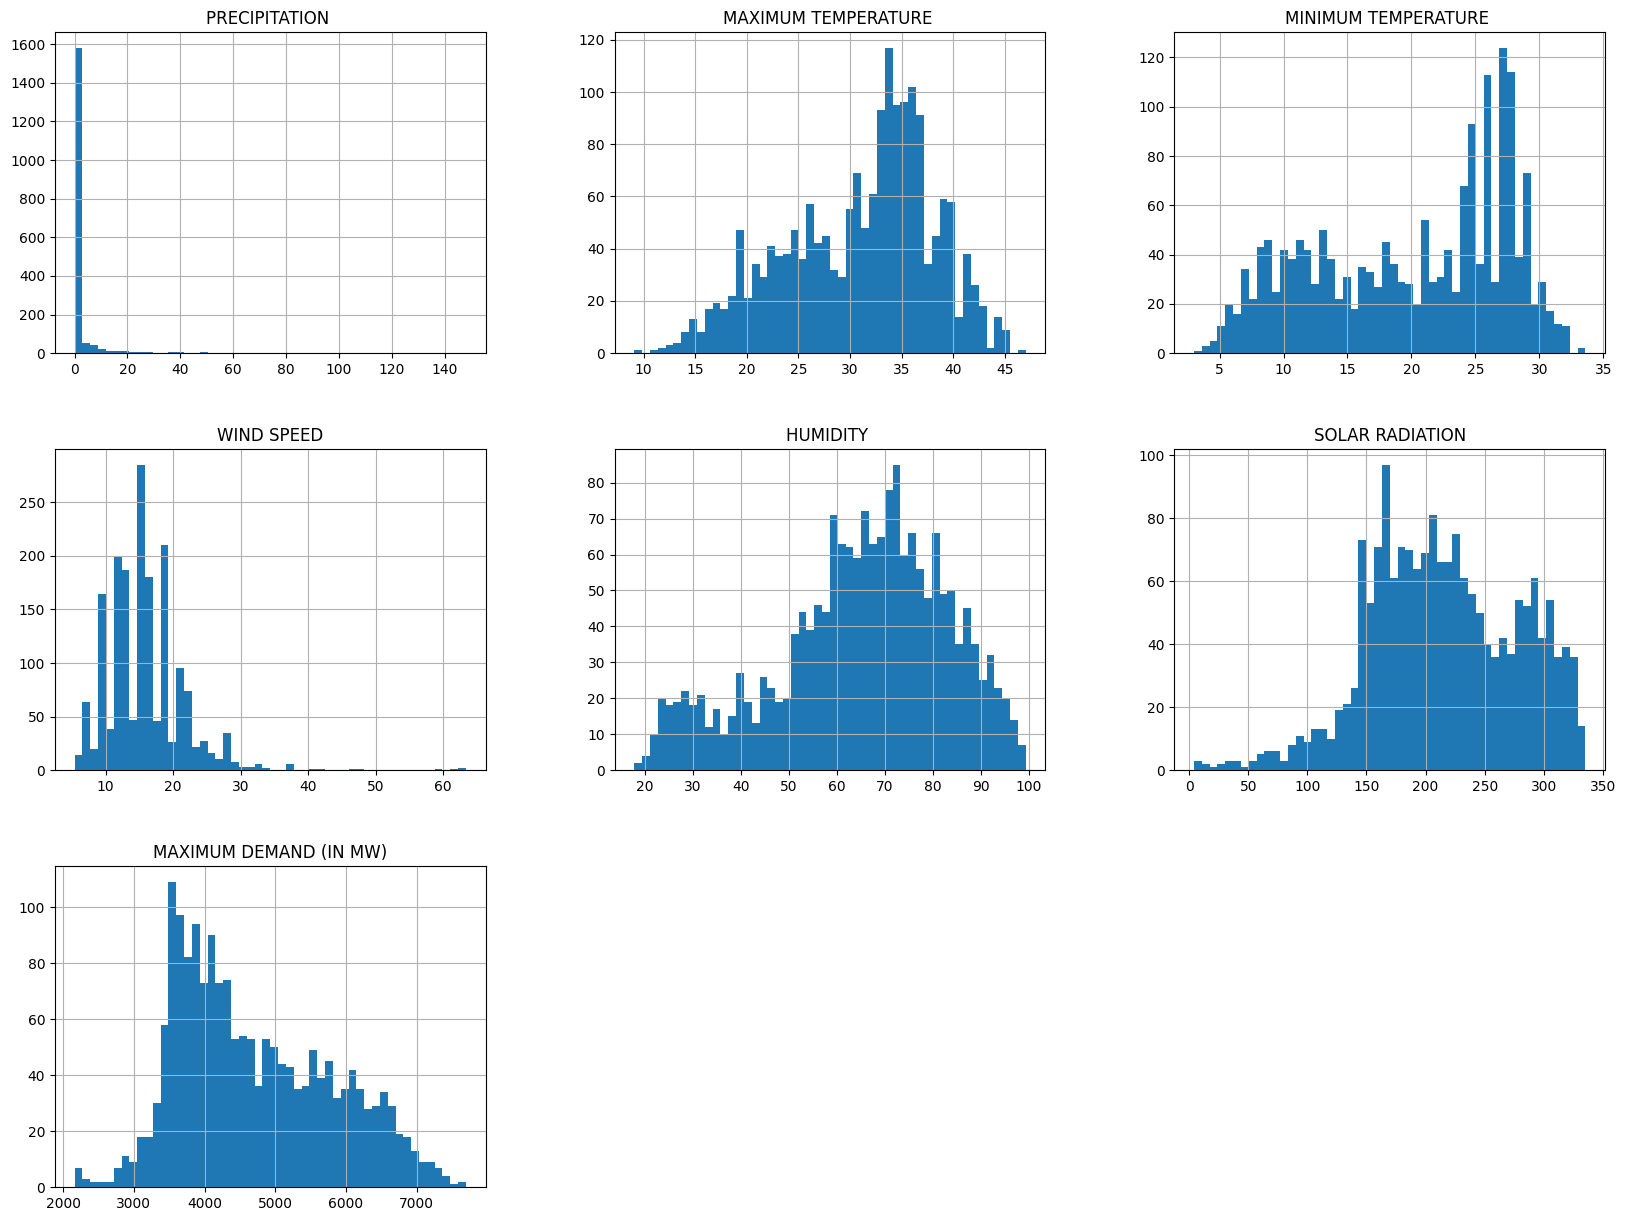

In [ ]:
df.hist(bins=50, figsize=(20,15)) #plotting the histograms
plt.show()

In [ ]:
df.isna().sum() #checking the missing values

,0
PRECIPITATION,0
MAXIMUM TEMPERATURE,0
MINIMUM TEMPERATURE,0
WIND SPEED,0
HUMIDITY,0
SOLAR RADIATION,0
MAXIMUM DEMAND (IN MW),0


                        PRECIPITATION   MAXIMUM TEMPERATURE   \
PRECIPITATION                 1.000000             -0.045191   
MAXIMUM TEMPERATURE          -0.045191              1.000000   
MINIMUM TEMPERATURE           0.088553              0.883739   
WIND SPEED                    0.105624              0.241023   
HUMIDITY                      0.281111             -0.634077   
SOLAR RADIATION              -0.266499              0.732339   
MAXIMUM DEMAND (IN MW)        0.063782              0.474118   

                        MINIMUM TEMPERATURE   WIND SPEED  HUMIDITY   \
PRECIPITATION                       0.088553    0.105624   0.281111   
MAXIMUM TEMPERATURE                 0.883739    0.241023  -0.634077   
MINIMUM TEMPERATURE                 1.000000    0.252332  -0.299000   
WIND SPEED                          0.252332    1.000000  -0.205987   
HUMIDITY                           -0.299000   -0.205987   1.000000   
SOLAR RADIATION                     0.504882    0.280936  -0.

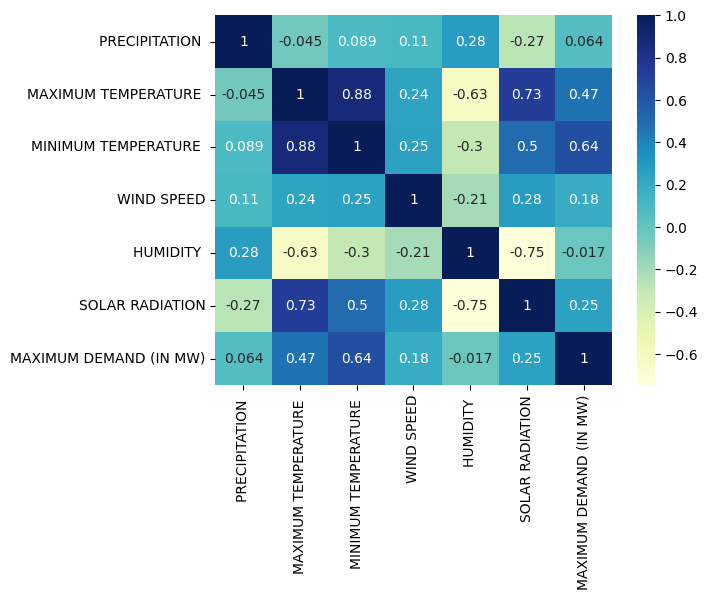

In [ ]:
print(df.corr(numeric_only=True)) #It gives the correlation value between different numeric features (in our case all are numeric)
dataplot = sb.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True) #the same correlation can be shown as a heatmap

plt.show()

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip() #Stripping the spaces from the column names

Index(['PRECIPITATION ', 'MAXIMUM TEMPERATURE ', 'MINIMUM TEMPERATURE ',
       'WIND SPEED', 'HUMIDITY ', 'SOLAR RADIATION', 'MAXIMUM DEMAND (IN MW)'],
      dtype='object')


<Axes: xlabel='MAXIMUM TEMPERATURE', ylabel='MINIMUM TEMPERATURE'>

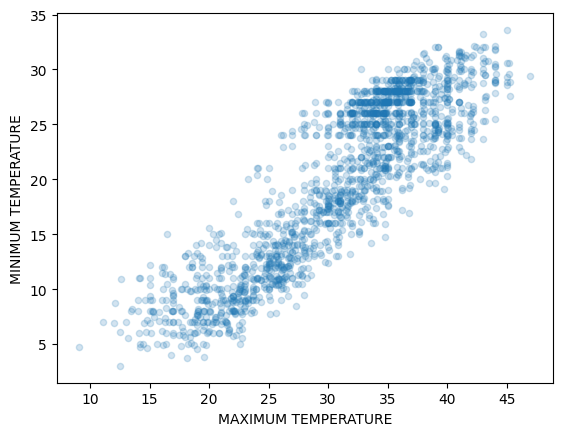

In [ ]:
df.plot(kind="scatter", x="MAXIMUM TEMPERATURE", y="MINIMUM TEMPERATURE",alpha=0.2) #A Positive Correlation Example

<Axes: xlabel='MAXIMUM DEMAND (IN MW)', ylabel='PRECIPITATION'>

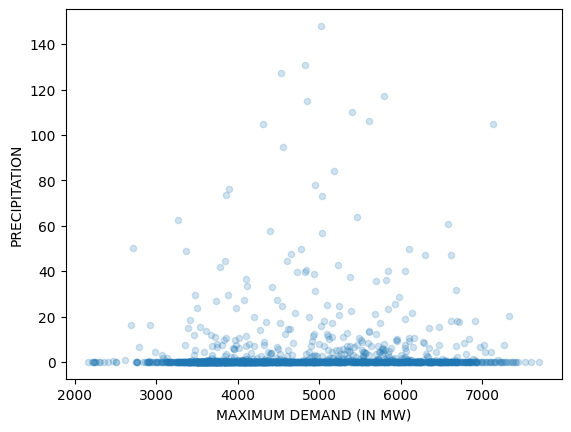

In [ ]:
df.plot(kind="scatter", x="MAXIMUM DEMAND (IN MW)", y="PRECIPITATION",alpha=0.2) #A Approx Zero Correlation Example

<Axes: xlabel='HUMIDITY', ylabel='SOLAR RADIATION'>

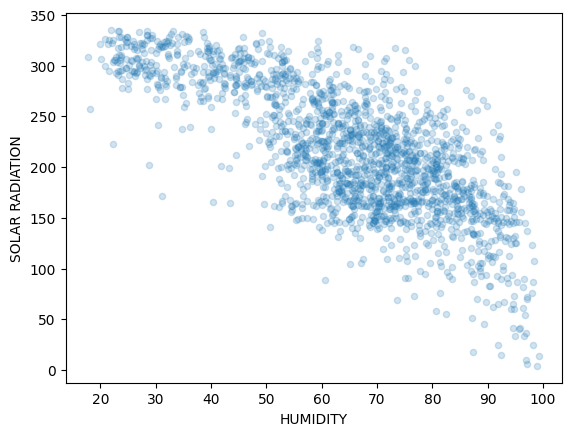

In [ ]:
df.plot(kind="scatter", x="HUMIDITY", y="SOLAR RADIATION",alpha=0.2) #A Negative Correlation Example

# Train- Test Split

In [ ]:
X = df.drop(columns = ['MAXIMUM DEMAND (IN MW)']) #X is dataframe of features and we will use this for modelling
y = df['MAXIMUM DEMAND (IN MW)'] # y is target variable
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 5) #the data is splited into train and test sets
# 80% of the data will be used for training the model
#20% of the data will be used to test the model and calculate the metrics


#Preprocessing

In [ ]:
# Creating Pipeline to scale our data
from sklearn.pipeline import Pipeline # importing Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler # importing StandardScaler and MinMaxScaler to scale our data
num_pipeline = Pipeline([
 ('min_max_scale', MinMaxScaler())
 ])
num_pipeline
# Though we have imported both StandardScaler and MinMaxScaler, we will use only Min Max Scaling

Pipeline(steps=[('min_max_scale', MinMaxScaler())])

In [ ]:
X_train = num_pipeline.fit_transform(X_train) #fitting and transforming our  train data using the pipeline we just created
X_test = num_pipeline.transform(X_test) #transforming our test data using the pipeline we just created

In [ ]:
X_train #our train data after fit and transforming scaling
#It is in array form

array([[0.        , 0.7414248 , 0.8627451 , 0.19482759, 0.64294479,
        0.65555892],
       [0.04273935, 0.3298153 , 0.30065359, 0.22413793, 0.93742331,
        0.36473796],
       [0.05879524, 0.34036939, 0.49019608, 0.13103448, 0.81717791,
        0.39957589],
       ...,
       [0.        , 0.55936675, 0.51960784, 0.10344828, 0.49693252,
        0.58891245],
       [0.07748511, 0.59366755, 0.77777778, 0.16206897, 0.86748466,
        0.36473796],
       [0.        , 0.70184697, 0.81699346, 0.22413793, 0.61349693,
        0.80369585]])

In [ ]:
X_test # our test data after transformation
#In array format

array([[0.07178959, 0.60422164, 0.75163399, 0.26724138, 0.74601227,
        0.40381703],
       [0.        , 0.33773087, 0.21895425, 0.06896552, 0.73128834,
        0.46167828],
       [0.        , 0.27704485, 0.22875817, 0.17586207, 0.90306748,
        0.58739776],
       ...,
       [0.        , 0.81530343, 0.83333333, 0.16206897, 0.1595092 ,
        0.96061799],
       [0.72153764, 0.15831135, 0.09803922, 0.19310345, 0.88711656,
        0.43259618],
       [0.        , 0.73614776, 0.58823529, 0.22413793, 0.25644172,
        0.89427446]])

In [ ]:
#Converting array to dataframe
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [ ]:
X_train #our train data after scaling
#It is in dataframe form

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.000000,0.741425,0.862745,0.194828,0.642945,0.655559
1,0.042739,0.329815,0.300654,0.224138,0.937423,0.364738
2,0.058795,0.340369,0.490196,0.131034,0.817178,0.399576
3,0.020621,0.308707,0.261438,0.260345,0.845399,0.487428
4,0.084425,0.656992,0.823529,0.193103,0.721472,0.611330
...,...,...,...,...,...,...
1431,0.000000,0.715040,0.588235,0.100000,0.570552,0.719782
1432,0.000000,0.477573,0.477124,0.224138,0.661350,0.619206
1433,0.000000,0.559367,0.519608,0.103448,0.496933,0.588912
1434,0.077485,0.593668,0.777778,0.162069,0.867485,0.364738


In [ ]:
X_test # our test data after transformation
#It is in dataframe form

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.071790,0.604222,0.751634,0.267241,0.746012,0.403817
1,0.000000,0.337731,0.218954,0.068966,0.731288,0.461678
2,0.000000,0.277045,0.228758,0.175862,0.903067,0.587398
3,0.000000,0.757256,0.653595,0.162069,0.193865,0.839443
4,0.000000,0.683377,0.816993,0.162069,0.650307,0.580127
...,...,...,...,...,...,...
354,0.000000,0.403694,0.333333,0.068966,0.629448,0.535898
355,0.000000,0.203166,0.032680,0.068966,0.828221,0.447137
356,0.000000,0.815303,0.833333,0.162069,0.159509,0.960618
357,0.721538,0.158311,0.098039,0.193103,0.887117,0.432596


##**Note:** Scaling has no affect on the Distribution and Correlation



## Transforming the Dataset to reduce Skewness

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip() #Stripping the spaces from the column names

Index(['PRECIPITATION', 'MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE',
       'WIND SPEED', 'HUMIDITY', 'SOLAR RADIATION', 'MAXIMUM DEMAND (IN MW)'],
      dtype='object')


##Checking Skewness before transforming
Skew = 0 implies Gaussian Distribution

Skew > 0 implies most of the data is on Left Side of Distribution means Right Skewed

Skew < 0 implies most of the data is on Right Side of Distribution means Left Skewed

In [ ]:
#Checking Skewness of features before tranformation
from scipy.stats import skew
print(skew(df['MINIMUM TEMPERATURE']))
print(skew(df['MAXIMUM TEMPERATURE']))
print(skew(df['HUMIDITY']))
print(skew(df['SOLAR RADIATION']))
print(skew(df['PRECIPITATION']))
print(skew(df['WIND SPEED']))
print(skew(df['MAXIMUM DEMAND (IN MW)']))

-0.3664008176039748
-0.4729483917347346
-0.533913770064499
-0.1745236401182819
7.2315653449241815
1.9607031783189597
0.45248362379882673


##Assigning a new DataFrame df_new so that we can do transformation on it.

In [ ]:
df_new = df

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# df_new is our DataFrame
# Transforming right-skewed columns
df_new['PRECIPITATION'] = np.log1p(df_new['PRECIPITATION'])  # log(1 + x) to handle zero values
df_new['WIND SPEED'] = np.log1p(df_new['WIND SPEED'])

# Transforming left-skewed columns using Box-Cox transformation
# Note: Box-Cox requires the data to be positive
for col in ['MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE', 'HUMIDITY', 'SOLAR RADIATION']:
    df_new[col], _ = boxcox(df_new[col] + 1)  # Adding 1 to ensure positivity

# Display transformed DataFrame
print(df_new.head())


   PRECIPITATION  MAXIMUM TEMPERATURE  MINIMUM TEMPERATURE  WIND SPEED  \
0            0.0           149.014966             8.127997    2.341806   
1            0.0           153.596258            11.740688    2.501436   
2            0.0           122.802976            10.161268    3.095578   
3            0.0           100.730646            11.918875    3.113515   
4            0.0           133.457234            11.209308    3.117950   

     HUMIDITY  SOLAR RADIATION  MAXIMUM DEMAND (IN MW)  
0  615.755320       285.341076                  4472.0  
1  622.790734       292.590263                  4228.0  
2  808.391523       297.435125                  4331.0  
3  874.832268       232.492909                  4461.0  
4  742.466971       294.809636                  4170.0  


##Checking the distribution of features after transformation

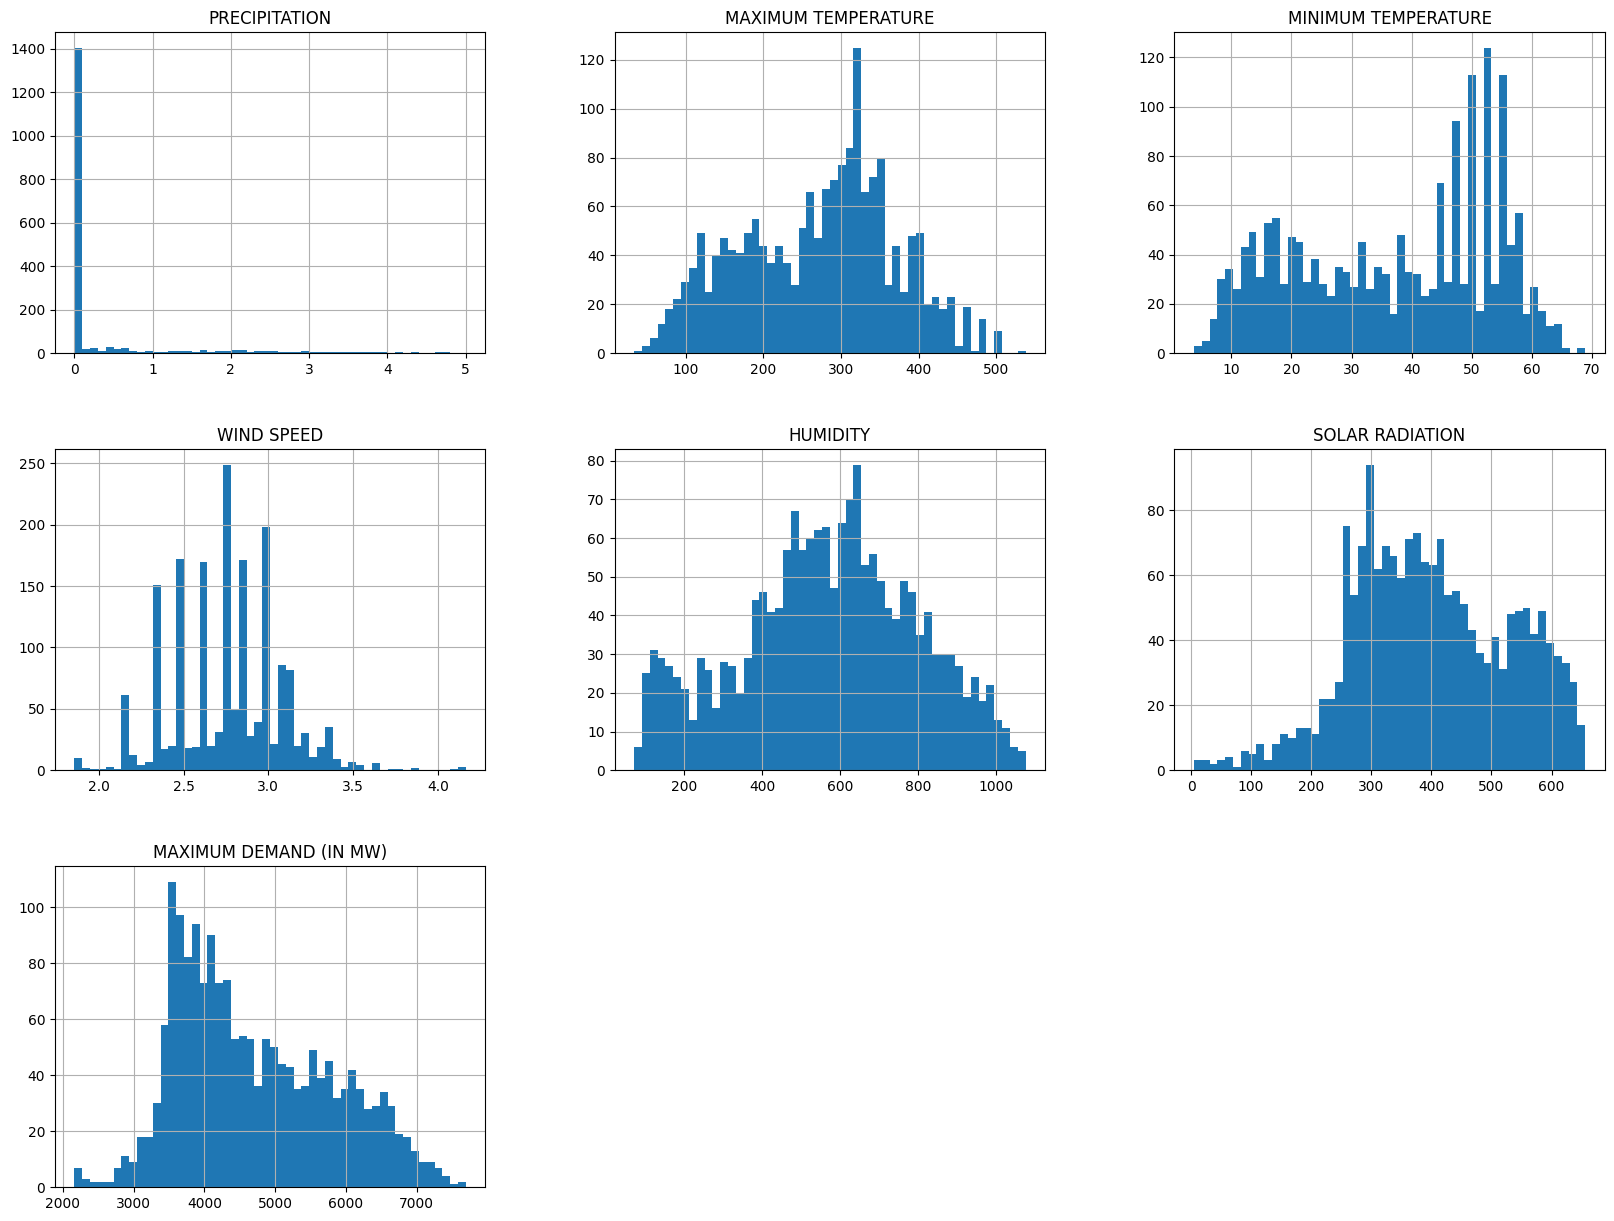

In [ ]:
df_new.hist(bins=50, figsize=(20,15)) #plotting the histograms
plt.show()

In [ ]:
df_new

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION,MAXIMUM DEMAND (IN MW)
0,0.0,149.014966,8.127997,2.341806,615.755320,285.341076,4472.0
1,0.0,153.596258,11.740688,2.501436,622.790734,292.590263,4228.0
2,0.0,122.802976,10.161268,3.095578,808.391523,297.435125,4331.0
3,0.0,100.730646,11.918875,3.113515,874.832268,232.492909,4461.0
4,0.0,133.457234,11.209308,3.117950,742.466971,294.809636,4170.0
...,...,...,...,...,...,...,...
1790,0.0,118.649290,16.153596,2.341806,949.880073,253.594243,4531.0
1791,0.0,118.649290,14.281392,2.341806,936.659040,257.165353,4578.0
1792,0.0,109.531081,19.436407,2.341806,983.241593,251.612899,4884.0
1793,0.0,117.620565,21.021857,2.341806,918.596035,192.524798,4556.0


## Checking Skewness after Transformation

In [ ]:
from scipy.stats import skew
print(skew(df_new['MINIMUM TEMPERATURE']))
print(skew(df_new['MAXIMUM TEMPERATURE']))
print(skew(df_new['HUMIDITY']))
print(skew(df_new['SOLAR RADIATION']))
print(skew(df_new['PRECIPITATION']))
print(skew(df_new['WIND SPEED']))

-0.25879912467888466
-0.1309773660344183
-0.1417898118724862
-0.053258042808847605
2.7394062087375226
0.11797032289958459


##We can see that the skewness has reduced significantly

## Checking the Correlation between different features after transformation

                        PRECIPITATION  MAXIMUM TEMPERATURE  \
PRECIPITATION                1.000000            -0.031047   
MAXIMUM TEMPERATURE         -0.031047             1.000000   
MINIMUM TEMPERATURE          0.159025             0.874303   
WIND SPEED                   0.218035             0.283733   
HUMIDITY                     0.404068            -0.643197   
SOLAR RADIATION             -0.272035             0.754086   
MAXIMUM DEMAND (IN MW)       0.124853             0.507443   

                        MINIMUM TEMPERATURE  WIND SPEED  HUMIDITY  \
PRECIPITATION                      0.159025    0.218035  0.404068   
MAXIMUM TEMPERATURE                0.874303    0.283733 -0.643197   
MINIMUM TEMPERATURE                1.000000    0.298374 -0.281289   
WIND SPEED                         0.298374    1.000000 -0.201573   
HUMIDITY                          -0.281289   -0.201573  1.000000   
SOLAR RADIATION                    0.509171    0.306377 -0.750849   
MAXIMUM DEMAND (IN M

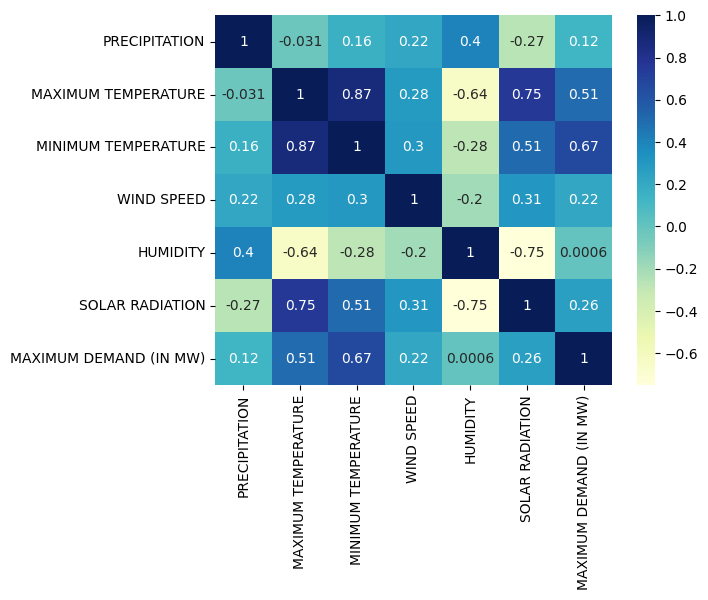

In [ ]:
print(df_new.corr(numeric_only=True))
dataplot = sb.heatmap(df_new.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()

##**Note** The transformation that we did to reduce skewness has impacted the distribution and correlation of features.

# Creating Training dataset from this transformed dataset

In [ ]:
Xs = df_new.drop(columns = ['MAXIMUM DEMAND (IN MW)']) #X is dataframe of features and we will use this for modelling
ys = df_new['MAXIMUM DEMAND (IN MW)'] # y is target variable
Xs_train , Xs_test, ys_train, ys_test = train_test_split(Xs,ys,test_size = 0.2,random_state = 5) #the data is splited into train and test sets
# 80% of the data will be used for training the model
#20% of the data will be used to test the model and calculate the metrics

# Preprocessing again on Transformed Dataset

In [ ]:
from sklearn.pipeline import Pipeline # importing Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler # importing StandardScaler and MinMaxScaler to scale our data
num_pipeline_s = Pipeline([
 ('min_max_scale', MinMaxScaler())
 ])
num_pipeline

Pipeline(steps=[('min_max_scale', MinMaxScaler())])

In [ ]:
Xs_train = num_pipeline_s.fit_transform(Xs_train) #fitting and transforming our  train data using the pipeline we just created
Xs_test = num_pipeline_s.transform(Xs_test) #transforming our test data using the pipeline we just created

In [ ]:
Xs_train

array([[0.        , 0.64471898, 0.83858187, 0.44060107, 0.54377586,
        0.62101407],
       [0.38642262, 0.21349832, 0.246611  , 0.48032206, 0.91318779,
        0.32134726],
       [0.4430868 , 0.22236958, 0.43167629, 0.33903068, 0.75438188,
        0.35594746],
       ...,
       [0.        , 0.4328813 , 0.46189176, 0.28646656, 0.38613494,
        0.55038818],
       [0.49386084, 0.4702958 , 0.7415179 , 0.39141798, 0.8195201 ,
        0.32134726],
       [0.        , 0.59591394, 0.7860323 , 0.48032206, 0.5105575 ,
        0.78136418]])

In [ ]:
#Converting array to dataframe
Xs_train = pd.DataFrame(Xs_train, columns = Xs.columns)
Xs_test = pd.DataFrame(Xs_test, columns = Xs.columns)

In [ ]:
X

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.0,22.3,5.8,9.4,70.1,160.9
1,0.0,22.7,7.9,11.2,70.6,164.5
2,0.0,19.9,7.0,21.1,83.1,166.9
3,0.0,17.7,8.0,21.5,87.3,134.3
4,0.0,20.9,7.6,21.6,78.8,165.6
...,...,...,...,...,...,...
1790,0.0,19.5,10.3,9.4,91.9,145.0
1791,0.0,19.5,9.3,9.4,91.1,146.8
1792,0.0,18.6,12.0,9.4,93.9,144.0
1793,0.0,19.4,12.8,9.4,90.0,113.7


In [ ]:
Xs_train

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.000000,0.644719,0.838582,0.440601,0.543776,0.621014
1,0.386423,0.213498,0.246611,0.480322,0.913188,0.321347
2,0.443087,0.222370,0.431676,0.339031,0.754382,0.355947
3,0.268011,0.196118,0.210682,0.524838,0.790690,0.444923
4,0.509913,0.542436,0.793499,0.438147,0.635762,0.574030
...,...,...,...,...,...,...
1431,0.000000,0.612014,0.533784,0.279424,0.463390,0.689992
1432,0.000000,0.348451,0.418367,0.480322,0.564894,0.582365
1433,0.000000,0.432881,0.461892,0.286467,0.386135,0.550388
1434,0.493861,0.470296,0.741518,0.391418,0.819520,0.321347


In [ ]:
Xs_test

,PRECIPITATION,MAXIMUM TEMPERATURE,MINIMUM TEMPERATURE,WIND SPEED,HUMIDITY,SOLAR RADIATION
0,0.479677,0.482044,0.712120,0.532822,0.665505,0.360188
1,0.000000,0.220140,0.172817,0.210284,0.647603,0.418604
2,0.000000,0.170959,0.181453,0.412811,0.866728,0.548795
3,0.000000,0.664663,0.603960,0.391418,0.119940,0.820689
4,0.000000,0.573656,0.786032,0.391418,0.552190,0.541156
...,...,...,...,...,...,...
354,0.000000,0.278100,0.277221,0.210284,0.528463,0.494963
355,0.000000,0.116587,0.022817,0.210284,0.768518,0.403827
356,0.000000,0.739833,0.804725,0.391418,0.095529,0.955631
357,0.933755,0.086603,0.072022,0.438147,0.845451,0.389114


# Regression Analysis

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
linear_model = LinearRegression()
linear_model

LinearRegression()

In [ ]:
linear_model.fit(Xs_train, ys_train)

LinearRegression()

In [ ]:
ys_test

,MAXIMUM DEMAND (IN MW)
1321,5948.0
1047,3883.0
33,4386.0
1546,4714.0
939,5609.0
...,...
656,3414.0
1437,5214.0
1563,5236.0
1423,4547.0


In [ ]:
linear_model_predict = pd.DataFrame(linear_model.predict(Xs_test))
linear_model_predict

,0
0,5268.036233
1,3748.838873
2,4333.725380
3,4560.716228
4,5638.342804
...,...
354,3890.704225
355,3488.752384
356,5175.432117
357,3263.705224


In [ ]:
linear_model.score(Xs_test,ys_test) #r2 score

0.48769405474346705

In [ ]:
mean_absolute_error(ys_test,linear_model.predict(Xs_test)) # mean absolute score

644.6183792156481

In [ ]:
# Get the coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Generate the feature names
feature_names = Xs_train.columns if isinstance(Xs_train, pd.DataFrame) else [f"x{i}" for i in range(Xs_train.shape[1])]

# Construct the linear equation
equation_terms = [
    f"{coef:.4f} * {name}"
    for coef, name in zip(coefficients, feature_names)
    if coef != 0
]

# Join the terms into a single equation
equation = " + ".join(equation_terms)

# Include the intercept in the equation
equation = f"y = {intercept:.4f} + " + equation

# Print the formatted linear equation
print("Linear Regression Equation:")
print(equation)


Linear Regression Equation:
y = 1621.6680 + -661.4672 * PRECIPITATION + 636.5114 * MAXIMUM TEMPERATURE + 2705.9610 * MINIMUM TEMPERATURE + 642.9494 * WIND SPEED + 1812.4287 * HUMIDITY + 502.8048 * SOLAR RADIATION


## Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# Two steps:
# 1. Polynomial features of desired degree (here degree=2)
# 2. Linear regression
poly_model = Pipeline([
('polynomial_transform', PolynomialFeatures(degree=2)),
('linear_regression', LinearRegression())])
# Train with feature matrix Xs_train and label vector ys_train
poly_model.fit(Xs_train, ys_train)

Pipeline(steps=[('polynomial_transform', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [ ]:
poly_model_predict = pd.DataFrame(poly_model.predict(Xs_test))
poly_model_predict

,0
0,5143.963420
1,4075.977293
2,4268.541218
3,4189.751965
4,5844.648008
...,...
354,3692.745054
355,4971.444075
356,5790.847882
357,4933.739153


In [ ]:
poly_model.score(Xs_test,ys_test)

0.7516231322050871

In [ ]:
mean_absolute_error(ys_test,poly_model.predict(Xs_test))

426.0561453272595

In [ ]:
linear_model = poly_model.named_steps['linear_regression']
polynomial_transform = poly_model.named_steps['polynomial_transform']

# Get the coefficients and intercept
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Generate the feature names
feature_names = polynomial_transform.get_feature_names_out()

# Construct the polynomial equation
equation_terms = [
    f"{coef:.4f} * {name}"
    for coef, name in zip(coefficients, feature_names)
    if coef != 0
]

# Join the terms into a single equation
equation = " + ".join(equation_terms)

# Include the intercept in the equation
equation = f"y = {intercept:.4f} + " + equation

# Print the formatted polynomial equation
print("Polynomial Equation:")
print(equation)


Polynomial Equation:
y = 4342.1000 + -0.0000 * 1 + -3199.6159 * PRECIPITATION + 1611.2751 * MAXIMUM TEMPERATURE + -8109.5546 * MINIMUM TEMPERATURE + 1989.9769 * WIND SPEED + 2449.2216 * HUMIDITY + -2722.9714 * SOLAR RADIATION + 945.1447 * PRECIPITATION^2 + 9092.6005 * PRECIPITATION MAXIMUM TEMPERATURE + -5039.7712 * PRECIPITATION MINIMUM TEMPERATURE + 1564.5610 * PRECIPITATION WIND SPEED + 1524.2981 * PRECIPITATION HUMIDITY + -66.3806 * PRECIPITATION SOLAR RADIATION + 4624.7852 * MAXIMUM TEMPERATURE^2 + -6062.1537 * MAXIMUM TEMPERATURE MINIMUM TEMPERATURE + -7.2103 * MAXIMUM TEMPERATURE WIND SPEED + -5068.7648 * MAXIMUM TEMPERATURE HUMIDITY + -515.5168 * MAXIMUM TEMPERATURE SOLAR RADIATION + 12582.5129 * MINIMUM TEMPERATURE^2 + -1171.8643 * MINIMUM TEMPERATURE WIND SPEED + 2021.3536 * MINIMUM TEMPERATURE HUMIDITY + 2309.6683 * MINIMUM TEMPERATURE SOLAR RADIATION + 152.6424 * WIND SPEED^2 + -1299.0396 * WIND SPEED HUMIDITY + -1714.3624 * WIND SPEED SOLAR RADIATION + -1291.9421 * HUMIDIT

## XgBoost

In [ ]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor(n_estimators = 10, random_state = 10)
# Fitting the model
xgb_r.fit(Xs_train, ys_train)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*__sklearn_tags__.*")

In [ ]:
xgb_r_predict = pd.DataFrame(xgb_r.predict(Xs_test))
xgb_r_predict

,0
0,5722.426758
1,4372.786621
2,4412.830078
3,4033.403320
4,6224.311523
...,...
354,3751.273682
355,5060.702148
356,5804.619141
357,4766.534668


In [ ]:
xgb_r.score(Xs_test,ys_test)

0.7581455117026745

In [ ]:
mean_absolute_error(ys_test, xgb_r.predict(Xs_test))

404.4834185672006

In [ ]:
# Get feature importances
importance = xgb_r.feature_importances_

# Generate feature names (assuming X_train is a DataFrame)
feature_names = Xs_train.columns if isinstance(Xs_train, pd.DataFrame) else [f"x{i}" for i in range(Xs_train.shape[1])]

# Construct a summary of feature importances
importance_summary = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_summary = importance_summary[importance_summary['Importance'] > 0]  # Filter for positive importance

# Print the feature importances
print("Feature Importances:")
print(importance_summary.sort_values(by='Importance', ascending=False))

# Optionally, if we want a "pseudo-equation":
# This won't be a typical equation but a weighted sum of contributions
equation_terms = [
    f"{imp:.4f} * {name}" for imp, name in zip(importance, feature_names) if imp > 0
]

# Construct a pseudo-equation representation
pseudo_equation = " + ".join(equation_terms)

print("\nPseudo-Equation Representation:")
print(f"y = {pseudo_equation}")


Feature Importances:
               Feature  Importance
2  MINIMUM TEMPERATURE    0.789814
1  MAXIMUM TEMPERATURE    0.075909
4             HUMIDITY    0.042325
0        PRECIPITATION    0.037010
5      SOLAR RADIATION    0.029495
3           WIND SPEED    0.025448

Pseudo-Equation Representation:
y = 0.0370 * PRECIPITATION + 0.0759 * MAXIMUM TEMPERATURE + 0.7898 * MINIMUM TEMPERATURE + 0.0254 * WIND SPEED + 0.0423 * HUMIDITY + 0.0295 * SOLAR RADIATION


## Regularisation

### Ridge (l2 Regularisation)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(random_state = 42)

ridge.fit(Xs_train, ys_train)
ridge.score(Xs_test, ys_test)

0.4874055101456993

In [ ]:
# Get the coefficients and intercept
coefficients = ridge.coef_
intercept = ridge.intercept_

# Generate the feature names (assuming X_train is a DataFrame)
feature_names = Xs_train.columns if isinstance(Xs_train, pd.DataFrame) else [f"x{i}" for i in range(Xs_train.shape[1])]

# Construct the Ridge regression equation
equation_terms = [
    f"{coef:.4f} * {name}"
    for coef, name in zip(coefficients, feature_names)
    if coef != 0
]

# Join the terms into a single equation
equation = " + ".join(equation_terms)

# Include the intercept in the equation
equation = f"y = {intercept:.4f} + " + equation

# Print the formatted Ridge regression equation
print("Ridge Regression Equation:")
print(equation)

Ridge Regression Equation:
y = 1689.3625 + -609.8422 * PRECIPITATION + 694.4054 * MAXIMUM TEMPERATURE + 2635.1764 * MINIMUM TEMPERATURE + 615.9366 * WIND SPEED + 1753.5047 * HUMIDITY + 465.0197 * SOLAR RADIATION


In [ ]:
# Index of Most Important Feature
np.argmax(np.absolute(ridge.coef_))
# np.absolute(ridge.coef_)

np.int64(2)

In [ ]:
# Index of Least Important Feature
np.argmin(np.absolute(ridge.coef_))
# np.absolute(ridge.coef_)

np.int64(5)

### Lasso (l1 Regularisation)

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state = 42)

lasso.fit(Xs_train, ys_train)
lasso.score(Xs_test, ys_test)

0.48834602308009056

In [ ]:
# Get the coefficients and intercept
coefficients = lasso.coef_
intercept = lasso.intercept_

# Generate the feature names (assuming X_train is a DataFrame)
feature_names = Xs_train.columns if isinstance(Xs_train, pd.DataFrame) else [f"x{i}" for i in range(Xs_train.shape[1])]

# Construct the Lasso regression equation
equation_terms = [
    f"{coef:.4f} * {name}"
    for coef, name in zip(coefficients, feature_names)
    if coef != 0
]

# Join the terms into a single equation
equation = " + ".join(equation_terms)

# Include the intercept in the equation
equation = f"y = {intercept:.4f} + " + equation

# Print the formatted Lasso regression equation
print("Lasso Regression Equation:")
print(equation)

Lasso Regression Equation:
y = 1846.5755 + -566.0225 * PRECIPITATION + 286.1290 * MAXIMUM TEMPERATURE + 2890.0078 * MINIMUM TEMPERATURE + 541.1987 * WIND SPEED + 1594.7689 * HUMIDITY + 481.0707 * SOLAR RADIATION


## Cross Validation of different Regression models

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# List of different cross-validation fold values
cv_values = [5, 10, 20, 50]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree 2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=1.0,random_state = 42),  # Adjust alpha as needed
    'Lasso Regression': Lasso(alpha=1.0,random_state = 42),  # Adjust alpha as needed
    'XGBoost': XGBRegressor(n_estimators = 10,random_state = 42)
}

# Dictionary to store max R2 scores for each model and cv value
max_r2_scores = {model_name: {} for model_name in models.keys()}

# Loop through each model and cv value
for model_name, model in models.items():
    for cv in cv_values:
        # Try to get scores, handle AttributeError
        try:
            scores = cross_val_score(model, Xs_train, ys_train, cv=cv, scoring='r2')
            max_r2_score = np.max(scores)

        except AttributeError:
            print(f"AttributeError encountered for {model_name} with cv={cv}. Skipping...")
            max_r2_score = np.nan  # Assign NaN for failed cases

        max_r2_scores[model_name][cv] = max_r2_score
        print(f"Maximum R2 score for {model_name} with cv={cv}: {max_r2_score:.4f}")

print("\nMax R2 Scores Summary:")
print(max_r2_scores)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*__sklearn_tags__.*")

Maximum R2 score for Linear Regression with cv=5: 0.5167
Maximum R2 score for Linear Regression with cv=10: 0.5448
Maximum R2 score for Linear Regression with cv=20: 0.5783
Maximum R2 score for Linear Regression with cv=50: 0.6492
Maximum R2 score for Polynomial Regression (degree 2) with cv=5: 0.8264
Maximum R2 score for Polynomial Regression (degree 2) with cv=10: 0.8262
Maximum R2 score for Polynomial Regression (degree 2) with cv=20: 0.8586
Maximum R2 score for Polynomial Regression (degree 2) with cv=50: 0.9133
Maximum R2 score for Ridge Regression with cv=5: 0.5181
Maximum R2 score for Ridge Regression with cv=10: 0.5446
Maximum R2 score for Ridge Regression with cv=20: 0.5780
Maximum R2 score for Ridge Regression with cv=50: 0.6478
Maximum R2 score for Lasso Regression with cv=5: 0.5173
Maximum R2 score for Lasso Regression with cv=10: 0.5442
Maximum R2 score for Lasso Regression with cv=20: 0.5780
Maximum R2 score for Lasso Regression with cv=50: 0.6501
Maximum R2 score for XGB

## Hyperparameter Tuning the  XgBoost Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(random_state=42)

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='r2',  # Use R2 score for evaluation
    n_jobs=-1,    # Use all available cores
    cv=5,         # 5-fold cross-validation
    verbose=1,
    random_state=42
)
random_search

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
# Fit the randomized search to the data
warnings.filterwarnings("ignore", category=FutureWarning, message=".*__sklearn_tags__.*")
random_search.fit(Xs_train, ys_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 0.9]},
                   random_state=42, scoring='r2', verbose=1)

In [ ]:
# Print the best hyperparameters and the best score
print("Best hyperparameters:", random_search.best_params_)
print("Best R2 score:", random_search.best_score_)

Best hyperparameters: {'subsample': 0.5, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7}
Best R2 score: 0.7893134636568605


In [ ]:
# Evaluate the best model on the test set
best_xgb_model = random_search.best_estimator_
test_r2 = best_xgb_model.score(Xs_test, ys_test)
print("Test R2 score:", test_r2)

Test R2 score: 0.7632032461420537


<Figure size 20000x10000 with 0 Axes>

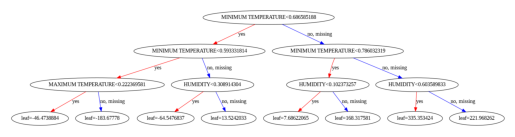

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(200, 100))
plot_tree(best_xgb_model, num_trees=0)
plt.show()

## SGD Regressor (Optional)

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

# Initialize the SGD Regressor for linear regression
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

# Fit the model on the training data
sgd_model.fit(X_train, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(sgd_model, X_test, y_test, cv=5, scoring='r2')
max_r2_score = np.max(cv_scores)

# Print the maximum R2 score
print(f"Maximum R2 score for SGD Regressor: {max_r2_score:.4f}")

# Optional: Print the coefficients and intercept
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)


Maximum R2 score for SGD Regressor: 0.4910
Coefficients: [-137.2968209   721.35247874 2398.83706418  518.17430924 1625.00694515
  721.00780977]
Intercept: [1465.40797521]


# Multi Layer Neural Network using Scikit- Learn

## Basic Model

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp_basic = MLPRegressor(random_state=42, max_iter = 10000)
mlp_basic.fit(Xs_train,ys_train)

MLPRegressor(max_iter=10000, random_state=42)

In [ ]:
mlp_basic.score(Xs_test,ys_test)

0.47951240792546457

In [ ]:
mean_absolute_error(ys_test, mlp_basic.predict(Xs_test))

647.5143754379117

### Our Basic Multi Layer Model Underperforms all Regression Models

##Hyperperamter Tuning on M.L.P Model

In [ ]:
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Define the hyperparameter space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100, 50)],
    'activation': ['relu', 'tanh'],  # Activation functions
    'solver': ['adam', 'sgd'],       # Optimizers
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'learning_rate': ['constant', 'adaptive'],  # Learning rate strategies
    'learning_rate_init': [0.001, 0.01, 0.1],   # Initial learning rate
    'batch_size': [16, 32, 64],  # Mini-batch sizes
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,       # 3-fold cross-validation
    scoring='r2',  # Scoring metric
    random_state=42,
    verbose=1,
    n_jobs=-1    # Use all available cores
)

In [ ]:
# Fit the model
#random_search.fit(Xs_train, ys_train)

In [ ]:
# Best hyperparameters
#print("Best Parameters:", random_search.best_params_)
# Best estimator
#best_model = random_search.best_estimator_

In [ ]:
# Best Params:
''' Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}
'''

" Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.1, 'activation': 'tanh'}\n"

## Hyper-Tuned Model

In [ ]:
mlp = MLPRegressor(solver ='adam', learning_rate_init= 0.1,learning_rate= 'adaptive', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= 'tanh', random_state = 15, max_iter = 1000)

In [ ]:
mlp.fit(Xs_train,ys_train)

MLPRegressor(activation='tanh', alpha=0.1, batch_size=64,
             hidden_layer_sizes=(50,), learning_rate='adaptive',
             learning_rate_init=0.1, max_iter=1000, random_state=15)

In [ ]:
mlp.predict(Xs_test)

array([5420.55620942, 4067.23931772, 4145.96369629, 4190.85294934,
       5878.92565036, 6198.77566789, 5898.33132756, 4097.72161177,
       3800.36084401, 3804.46711814, 5240.13146595, 3802.49803965,
       4145.78482055, 4513.79503808, 3799.48393496, 4212.56741666,
       3818.79717219, 5691.69607705, 4189.89927157, 3797.69642553,
       4901.01712401, 4358.57693994, 3758.94813779, 4683.72208039,
       3865.08242173, 3829.0398945 , 4166.38050383, 5201.25022997,
       5909.84845779, 5390.27573892, 4948.02384091, 4062.36448511,
       5024.35651835, 4121.41150634, 3801.67436156, 3805.297946  ,
       4132.28593112, 6050.6903667 , 3829.27603239, 5306.68748621,
       3821.94821818, 5879.77983639, 4924.60207944, 5614.80253123,
       4035.92694049, 4005.33272877, 6256.03184041, 4538.12911904,
       5282.64810513, 4899.37279336, 4145.94935461, 5057.50008605,
       4064.0837484 , 3810.92423006, 6269.27169958, 5472.4757308 ,
       6313.2221436 , 5991.33142268, 4105.56111856, 4952.41868

In [ ]:
mlp.score(Xs_test,ys_test)

0.7259959083068295

In [ ]:
mean_absolute_error(ys_test, mlp.predict(Xs_test))

462.97581949973136

In [ ]:
# The performance has significantly increased

## Cross Validation of Multi Layer Neural Network

In [ ]:
''''
# List of different cross-validation fold values
cv_values = [5, 10, 20, 50]

# Initialize models
models = {'mlp': MLPRegressor(max_iter = 1000,solver ='adam', learning_rate_init= 0.1,learning_rate= 'adaptive', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= 'tanh', random_state = 15)}

# Dictionary to store max R2 scores for each model and cv value
max_r2_scores = {model_name: {} for model_name in models.keys()}

# Loop through each model and cv value
for model_name, model in models.items():
    for cv in cv_values:
        # Try to get scores, handle AttributeError
        try:
            scores = cross_val_score(model, Xs_train, ys_train, cv=cv, scoring='r2')
            max_r2_score = np.max(scores)

        except AttributeError:
            print(f"AttributeError encountered for {model_name} with cv={cv}. Skipping...")
            max_r2_score = np.nan  # Assign NaN for failed cases

        max_r2_scores[model_name][cv] = max_r2_score
        print(f"Maximum R2 score for {model_name} with cv={cv}: {max_r2_score:.4f}")

print("\nMax R2 Scores Summary:")
print(max_r2_scores) '''

'\'\n# List of different cross-validation fold values\ncv_values = [5, 10, 20, 50]\n\n# Initialize models\nmodels = {\'mlp\': MLPRegressor(max_iter = 1000,solver =\'adam\', learning_rate_init= 0.1,learning_rate= \'adaptive\', hidden_layer_sizes= (50,), batch_size= 64, alpha= 0.1, activation= \'tanh\', random_state = 15)}\n\n# Dictionary to store max R2 scores for each model and cv value\nmax_r2_scores = {model_name: {} for model_name in models.keys()}\n\n# Loop through each model and cv value\nfor model_name, model in models.items():\n    for cv in cv_values:\n        # Try to get scores, handle AttributeError\n        try:\n            scores = cross_val_score(model, Xs_train, ys_train, cv=cv, scoring=\'r2\')\n            max_r2_score = np.max(scores)\n\n        except AttributeError:\n            print(f"AttributeError encountered for {model_name} with cv={cv}. Skipping...")\n            max_r2_score = np.nan  # Assign NaN for failed cases\n\n        max_r2_scores[model_name][cv] = m

In [ ]:
# CV Scores is as follow:
'''
Maximum R2 score for mlp with cv=5: 0.7759
Maximum R2 score for mlp with cv=10: 0.7926
Maximum R2 score for mlp with cv=20: 0.8256
Maximum R2 score for mlp with cv=50: 0.8837

Max R2 Scores Summary:
{'mlp': {5: 0.7759172190804787, 10: 0.7925808459151684, 20: 0.8256236539963007, 50: 0.8837199759020116}}
'''

"\nMaximum R2 score for mlp with cv=5: 0.7759\nMaximum R2 score for mlp with cv=10: 0.7926\nMaximum R2 score for mlp with cv=20: 0.8256\nMaximum R2 score for mlp with cv=50: 0.8837\n\nMax R2 Scores Summary:\n{'mlp': {5: 0.7759172190804787, 10: 0.7925808459151684, 20: 0.8256236539963007, 50: 0.8837199759020116}}\n"

In [ ]:
pip install nnv

## Visualization of Neural Network

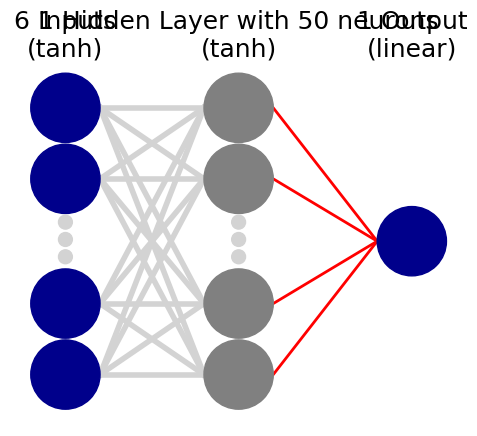

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [ ]:
from nnv import NNV

layersList = [
    {"title":"6 Inputs\n(tanh)", "units": 6, "color": "darkBlue"},
    {"title":"1 Hidden Layer with 50 neurons\n(tanh)", "units": 50,"edges_color":"red", "edges_width":2},
    {"title":"1 Output\n(linear)", "units": 1,"color": "darkBlue"},
]
NNV(layersList).render(save_to_file="my_example.png")